In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A1.1 - A-Priori-Wahrscheinlichkeiten
def P(w):
    if (w==1):
        P = 3/5
    else:
        P = 2/5
    return P

# A1.2 - Bayes-Klassifikator
def pxw(x,w):
    
    if (w==1):
        pxw = 1/6
    else:
        if (x==1):
            pxw = 0
        elif (x == 2 or x == 3 or x == 4 or x == 5):
            pxw = 1/6
        else:
            pxw = 1/3
    return pxw

def p(x): 
    
    return (P(1)*pxw(x,1)+P(2)*pxw(x,2))

def Pwx(x,w):
    
    return (pxw(x,w)*P(w))/p(x)

def map(x):
    
    if (Pwx(x,1) < Pwx(x,2)):
        return 2
    else:
        return 1

In [7]:
results = [map(1),map(2),map(3),map(4),map(5),map(6)]
results

[1, 1, 1, 1, 1, 2]

In [4]:
# A1.3
PF_naiv = 0
for i in range(1,7):
    PF_naiv += Pwx(i,2)*p(i)

PF_naiv

0.4

In [5]:
PF_bayes = 0
for i in range(1,7):
    if (map(i) == 1):
        PF_bayes += p(i)*Pwx(i,2)
    else:
        PF_bayes += p(i)*Pwx(i,1)

PF_bayes 

0.36666666666666664

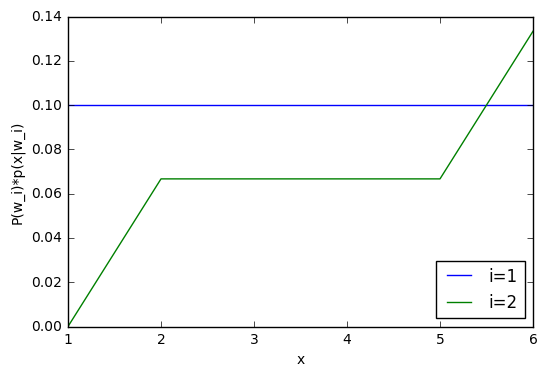

In [35]:
# Plot
x = [1]
y1 = [pxw(1,1)*P(1)]
y2 = [pxw(1,2)*P(2)]

for i in range(2, 7):
    x.append(i)
    y1.append(pxw(i,1)*P(1))
    y2.append(pxw(i,2)*P(2))
    

p1,=plt.plot(x,y1, label="P(w_1)*p(x|w_1)")
p2,=plt.plot(x,y2, label="P(w_2)*p(x|w_2)")
plt.xlabel('x')
plt.ylabel('P(w_i)*p(x|w_i)')
plt.legend([p1, p2], ["i=1", "i=2"],loc=4)
plt.show()